# David Flores

# Introduction

Most people are aware of how contagious diseases work. Some diseases have different levels of contagiousness as well as different levels of recovery. This means how easy or difficult it is to get infected by the disease and how easy or hard it is to recover from that disease, respectfully.

In this project, we will be working with different given parameters such as the probability of infection ($p_i$) and recovery ($p_r$) to show how a contagious disease can behave when also given a 200x200 grid where each cell (or coordinate) acts as a person. In order for a disease to be present, the center 4x4 (16 people) will be starting as the infected bunch. There will be four parts to show the analysis of the contagious disease.

$\cdot$ Part 1: The parameters $p_i$ and $p_r$ will be used slightly similar to check the behaviour of this disease. We will create a function called epidemics that takes in multiple parameters grid (200x200 grid), pi, pr, and vac. This function will return a new grid showing the new set of healthy, infected, and recovered people. To check when people get infected, we will use the particular function $1 - (1 - p_i)^k $, where $k$ is the amount of sick people.

$\cdot$ Part 2: We will create an animation function that will show the updated grid that the epidemics function returns. Basically the function will loop through the epidemics function using the updated grid and produce an animation that should show more people being infected and recovered (depending on $p_i$ and $p_r$) each time the epidemics function is looped.

$\cdot$ Part 3: This will be mainly an analysis part on how different values of $p_i$ and $p_r$ show how the disease can behave.

$\cdot$ Part 4: We mentioned earlier that the epidemics function takes a particular parameter called "vac". This variable will be equal to the percentage of people that get vaccinated in this 200x200 bunch. We will use this to show a different analysis of how the vaccine can change the behavior of the disease.

# Code and Code Analysis

Before we code anything, we will import and run all of the necessary libraries that will be needed throught the code and analysis.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors
import random

## Part 1: Epidemics

Here we are going to go more in depth of this epidemics function. We know it takes the parameters grid, pi, pr and vac. What epidemics will do, is contain a nested for loop that will loop through the rows and then loop through the columns of those rows if the grid parameter that the function takes. This will go through every single cell (or person) in this 200x200 grid and check if the person has been vaccinated, is healthy, sick or recovered. The value -1 means the person has been vaccinated, 0 means the person is healthy, 1 means the person is sick and 2 means the person has recovered. 

We will check for four different scenarios of each person:
We create a grid called nextday. This is the grid that will update as well check each person.

$\cdot$ If the person has been vaccinated, they are immune to the disease (meaning that value can't be 0 or change to 1 or 2). To check if a person is vaccinated, we create a 200x200 grid to show different probablities that each person will get vaccinated. If that cell in the vaccinated grid is greater than or equal to "vac", then the corresponding cell in nextday gets vaccinated. Note: this vaccination is a one time thing, meaning no one else gets vaccinated after the first day.

$\cdot$ If the person is healthy, well then we have to check if this healthy person is surrounded by anyone who is sick to see if they can get sick. We use the particular function $1 - (1 - p_i)^k$ to calculate what the probability is that this healthy person can get infected. The higher the value of k, the more likely it is that this healthy person will get sick. To actually check if they get sick, we set this probability greater than or equal to a random decimal between (0,1). If this inequality is true, then the person gets sick and we change the value of the corresonding cell in nextday to 1. If not, then they stay healthy and we keep 0 in nextday.

$\cdot$ If the person is sick, then we start to check how likely it is that this person will recover. We use the inequality if pr is greater than or equal to a random decimal between (0,1), then this person has recovered and we change the corresponding cell in nextday to 2. If not, then the person is still sick and we keep 1 in nextday.

$\cdot$ If the person has already recovered, then we keep 2 in nextday. At this point, the person is also immune, so the value 2 can't change to any other value.

Finally, the function will return the updated grid "nextday".

In [6]:
def epidemics(grid,pi,pr,vac):                 #define epidemics function taking the four parameters "grid, pi, pr and vac"
    vaccinated = vaccineprob <= vac            #create a truth table/grid of what cells get vaccinated
                                               #vaccineprob will be initialized outside of the function
        
    grid[(grid == 0) & (vaccinated)] = -1      #for the grid that we take, we check where the cell is healthy and has been vaccinated
                                               #wherever both booleans true, we set equal to -1
    
    gridex = np.zeros((202,202), dtype = int)  #create expanded 202x202 grid, this is so we can use slicing in future code
    gridex[1:201,1:201] = grid                 #use slicing to add the 200x200 grid parameter into our 202x202 grid
    
    nextday = grid                      #set nextday = to the grid parameter
    for row in range(1,200):            #initiate for loop of row index
        for cell in range(1,200):       #initiate for loop of column index
            sickness = random.random()  #set sick possibility equal to random value in [0,1)
            recovery = random.random()  #set recovery possibility equal to random value in [0,1)
            
            if gridex[row][cell] == -1:           #check if particular cell is = -1
                nextday[row - 1][cell - 1] = -1   #if so: corresponding cell in nextday = -1
            
            elif gridex[row][cell] == 0:          #check if cell is = 0 since it's not -1
                minigrid = np.array(gridex[row-1:row+2,cell-1:cell+2]).ravel() #if so: slice the 3x3 grid with this cell centered
                                                                               #and turn it into an array using .ravel()
                count = minigrid == 1             #create a truth array wherever we find a 1 in the 3x3 grid array
                sick = count.sum()                #set variable sick = sum of how many 1s we find in the array using .sum()
                probsick = 1-(1-pi)**(sick)       #set variable probsick = to the probability (%) that this cell can get sick
                
                if probsick >= sickness:            #check if probsick > or = sickness variable
                    nextday[row - 1][cell - 1] = 1  #if so the corresponding cell in nextday is now sick (= 1)
                                                    #if not, the corresponding cell stays healthy (= 0)
                        
            elif gridex[row][cell] == 1:            #check if cell = 1 since not -1 or 0
                if pr >= recovery:                  #check if pr parameter > or = recovery value
                    nextday[row - 1][cell - 1] = 2  #if so, the cell has recovered and the corresponding cell in nextday = 2
                elif pr < recovery:                 #if not, check if pr < recovery
                    nextday[row - 1][cell - 1] = 1  #if so, the cell is still sick
                    
            elif gridex[row][cell] == 2:            #check if the cell = 2
                nextday[row - 1][cell - 1] = 2      #if so, the cell has already recovered, keep cell = 2
                
    totaltruth = nextday == 1  #set truth table where cell in nextday = 1
    total = totaltruth.sum()   #sum of the number of 1s
    totalsick.append(total)    #add this sum to variable list "totalsick" using append
                               #totalsick will be initiated outside of the function
    return nextday   #return our updated 200x200 grid

## Part 2: Animations

In this part, we will see the actual animations of how the disease may behave depending on the values we use for the parameters pi and pr. The green cells are healthy people, the black cells are sick people and the orange cells are recovered people. This function will have to call back the epidemics function and will loop through it several times, where the "grid" parameter is being updated to the "nextday" grid that the epidemics function returned the previous day. For example, for day 22, the epidemics function will take in the "grid" parameter as the "nextday" grid that was returned by epidemics after day 21.

<IPython.core.display.Javascript object>


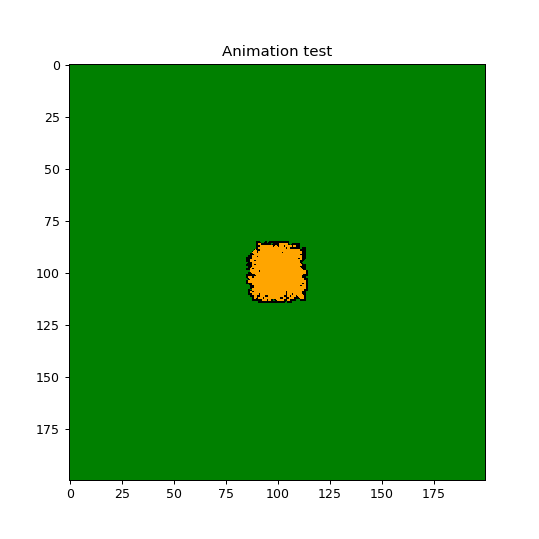

In [7]:
x = np.zeros((200,200), dtype = int)    #initialize 200x200 grid of zeros for epidemics function
x[98:102,98:102] = 1                    #set the 16 (4x4) centered cells = 1 (this starts the epidemic)
vaccineprob = np.random.rand(200,200)   #initiate vaccineprob as a grid of random values between [0,1)
totalsick = [16]

fig = plt.figure(figsize = (6,6))       #create figure for animation
ax = plt.subplot(111)                   #create subplot
plt.title("Animation test")             #add title to plot
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange']) 
#create color map where: 
#palegreen = -1 (healthy and vaccinated), green = 0 (healthy), black = 1 (sick) and orange = 2 (recovered)

im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2) #set im = colormap distribution using imshow()

def animate(i):    #define animate function
    global x
    
    x = epidemics(x,0.5,0.5,0)          #set x = epidemics function with certain parameters (pi, pr, and vac will change)
                                        #x is updated grid as we loop
    im.set_data(x)                        
    
    return im    #return animation

anim = FuncAnimation(fig=fig, func=animate,  interval=200, blit=True, repeat=False) #loop through animate function
plt.show()

With parameters pi and pr equal to 0.5 and 0.5, respectively, we get this kind of animation above. The disease seems to spread like an irregular circle that is expanding. However, with these values of pi and pr, this just means that you are half as likely to get infected or recover, which is not always the case. 

## Part 3: Exploring with different pi and pr values

What if the disease had different probabilities of getting infected or recovering. We will see animations for those different scenarios using our animation functions.

<IPython.core.display.Javascript object>


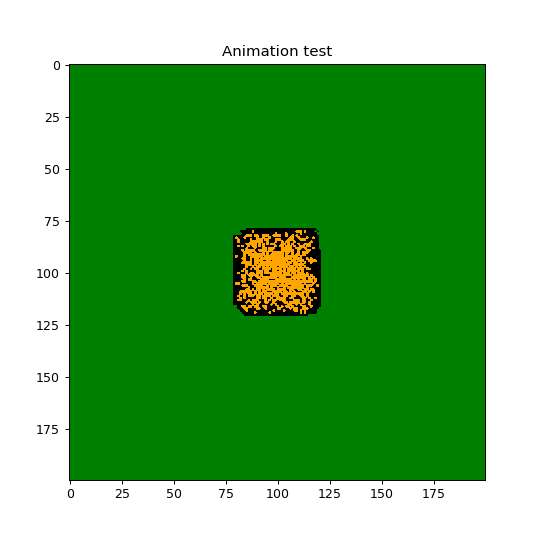

In [8]:
#for all future animations, the code is all the same except for x = epidemics(...),
#where the epidemics function will take different different values as parameters for the animations

x = np.zeros((200,200), dtype = int)
x[98:102,98:102] = 1
vaccineprob = np.random.rand(200,200)
totalsick = [16]

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)

def animate(i):
    global x
    
    x = epidemics(x,0.8,0.1,0)  #sset pi = 0.8, set pr = 0.1
    im.set_data(x)
    
    return im

anim = FuncAnimation(fig=fig, func=animate,  interval=200, blit=True, repeat=False)
plt.show()

The animation above has a pi value of 0.8 and a pr value of 0.1. This means that it is a high chance someone will get infected and a low chance someone will recover for this day. Through the animation, you can see that every healthy cell gets sick very quickly. Basically, once a green cell is near a black cell, it will get sick quickly. You can also see a difference in the shape of how the disease spreads. Previously, the animation showed more of a circle expanding but now it is more of a square or rectangle expanding. It also takes longer for a black cell to turn into a yellow cell (recovery).
Let's try a different value of pi and pr.

<IPython.core.display.Javascript object>


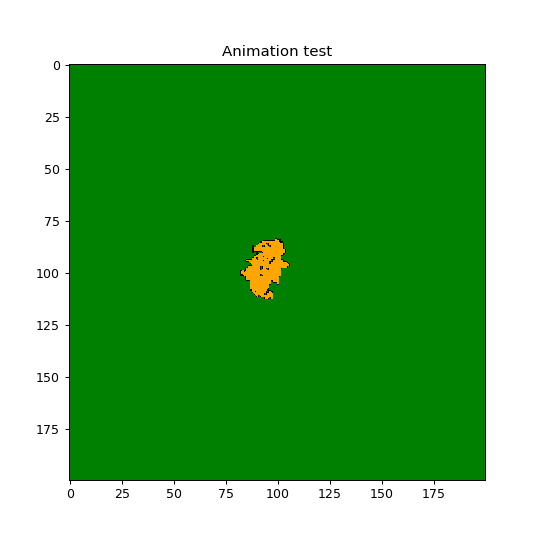

In [9]:
x = np.zeros((200,200), dtype = int)
x[98:102,98:102] = 1
vaccineprob = np.random.rand(200,200)
totalsick = [16]

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)

def animate(i):
    global x
    
    x = epidemics(x,0.25,0.8,0) #set pi = 0.25, set pr = 0.8
    im.set_data(x)
    
    return im

anim = FuncAnimation(fig=fig, func=animate,  interval=200, blit=True, repeat=False)
plt.show()


In the above animation, we use values pi = 0.25, and pr = 0.8. Now it is flipped, it will be harder for a healthy cell to get sick and easier for a sick cell to recover. Although the possibility of infection and recovery is randomized, we can see that with a lower pi and higher pr, there are a few cases the disease even dies out and leaves an area where people never got sick.
Let's try another scenario with low pi and pr values.

<IPython.core.display.Javascript object>


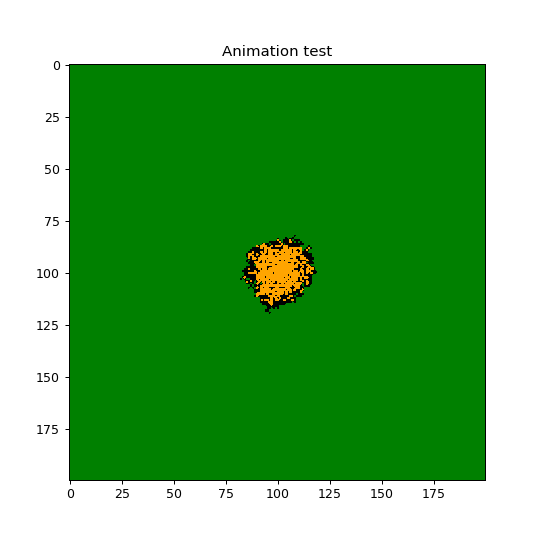

In [10]:
x = np.zeros((200,200), dtype = int)
x[98:102,98:102] = 1
vaccineprob = np.random.rand(200,200)
totalsick = [16]

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)

def animate(i):
    global x
    
    x = epidemics(x,0.15,0.1,0) #set pi = 0.15, set pr = 0.1
    im.set_data(x)
    
    return im

anim = FuncAnimation(fig=fig, func=animate,  interval=200, blit=True, repeat=False)
plt.show()

The animation above has values pi = 0.15 and pr = 0.1. This means that it is both hard to get infected and recover, and you can see that through the animation where the disease is struggling to spread immediately and the sick people are struggling to recover. Although they are each struggling, it seems as if everyone still gets sick and recovers, it just takes a longer amount of time. What about a scenario where both pi and pr are high?

<IPython.core.display.Javascript object>


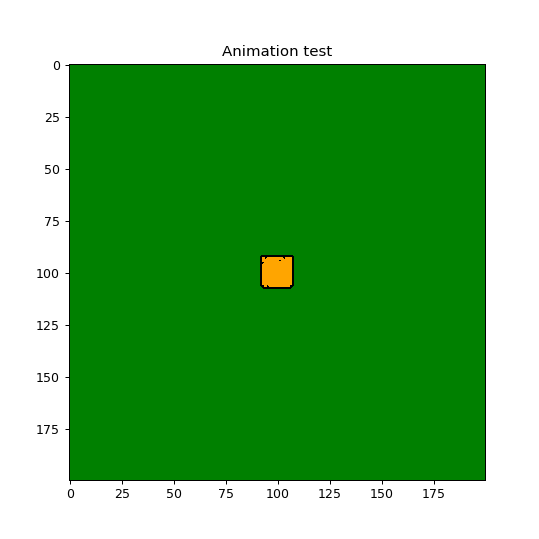

In [11]:
x = np.zeros((200,200), dtype = int)
x[98:102,98:102] = 1
vaccineprob = np.random.rand(200,200)
totalsick = [16]

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)

def animate(i):
    global x
    
    x = epidemics(x,0.85,0.9,0) #set pi = 0.85, set pr = 0.9
    im.set_data(x)
    
    return im

anim = FuncAnimation(fig=fig, func=animate,  interval=200, blit=True, repeat=False)
plt.show()

The aimation above has values pi = 0.85 and pr = 0.9. This means that now both people can get sick easily but recover easily as well. Through the animation, you can see that the disease spreads quickly, just like a previous animation but this time there is much less black/sick cells lying around after they got sick.

Now the animations above are just visual information, which is not always helpful, so instead we want to quantify certain data such as: how many people get sick each day. We will create a function called plotsick, which will call the function epidemics that calculates the number of sick people for that day and create an array of all of the sick people counted for each day until there are no more sick people. This function will then be plotted to show the distribution of how many people were sick throughout this time period.

In [12]:
def plotsick(grid,pi,pr,vac):      #define plotsick function that takes the values epidemics does to show comparisons
    i = 0                          #initiate counter
    while totalsick[i] != 0:       #create while loop to continue looping until we reach 0 value (0 sick people)
        epidemics(grid,pi,pr,vac)  #call epidemics to calculate total sick people
        i += 1                     #add 1 to counter
    return totalsick        #return totalsick list of counted sick people for every day


Now we plot this function where the x axis is the day and the y axis is how many people are sick

<IPython.core.display.Javascript object>


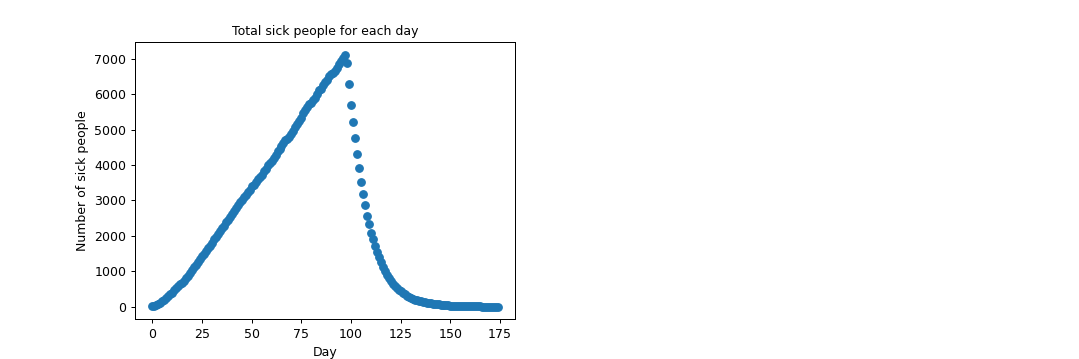

[16, 29, 53, 84, 113, 153, 203, 242, 297, 349, 403, 466, 520, 573, 634, 672, 734, 806, 875, 950, 1038, 1115, 1183, 1265, 1335, 1424, 1494, 1582, 1659, 1721, 1813, 1909, 1976, 2054, 2147, 2219, 2286, 2379, 2441, 2537, 2631, 2709, 2777, 2873, 2944, 3005, 3102, 3158, 3253, 3287, 3407, 3448, 3522, 3599, 3653, 3719, 3823, 3882, 3988, 4063, 4125, 4189, 4273, 4386, 4462, 4537, 4621, 4711, 4740, 4801, 4881, 4955, 5061, 5149, 5238, 5325, 5464, 5560, 5640, 5715, 5753, 5840, 5904, 5997, 6107, 6146, 6249, 6330, 6404, 6500, 6571, 6589, 6655, 6743, 6841, 6929, 7032, 7111, 6866, 6298, 5706, 5224, 4763, 4324, 3903, 3516, 3174, 2861, 2553, 2325, 2090, 1903, 1729, 1543, 1393, 1261, 1124, 1006, 907, 816, 732, 654, 591, 535, 480, 432, 387, 358, 311, 284, 253, 229, 203, 189, 177, 157, 146, 129, 117, 106, 94, 88, 80, 73, 67, 55, 53, 46, 42, 40, 36, 34, 32, 30, 29, 26, 24, 21, 18, 16, 15, 14, 12, 10, 10, 9, 8, 6, 5, 4, 4, 4, 3, 1, 0]


In [14]:
x = np.zeros((200,200), dtype = int)   #set 200x200 grid of zeros
x[98:102,98:102] = 1                   #set center 16 cells = 1
vaccineprob = np.random.rand(200,200)  #set 200x200 grid of random values between [0,1)
totalsick = [16]      #initiate totalsick list (at the start, we will always have 16 people sick for every scenario)

plt.figure(figsize=(12,4))          #setting a size for our figures
totalsick = plotsick(x,0.8,0.1,0)   #totalsick = plotsick function with certain parameters
plt.subplot(1,2,1)                  #create subplot
plt.scatter((range(len(totalsick))),totalsick) #create scatter plot where x is length of the totalsick list, y is totalsick list
plt.title("Total sick people for each day",fontsize= 10) #set title
plt.xlabel("Day",fontsize=10)                            #set x lable
plt.ylabel("Number of sick people",fontsize= 10);        #set y label
print(totalsick)     #print totalsick list

The graph above shows how many people were sick for each day until there were no more people sick. Although not every case is the same, somewhere around the 100th day, the peak was about 7000 people who were sick and the amount of sick people starts to drop significantly in this scenario where pi = 0.8 and pr = 0.1. We also notice that it took almost 200 days for everyone to be recovered. The printed values output also shows the specific number of sick people for each day until it reaches 0. These printed values represent what is on the graph and you will notice that each array starts with 16 and ends with 0, which represent the initial 16 sick people and the end of epidemic where no one is sick from this disease. 

The results for this graph does take longer than the animation, but this delivers more information which is worth more in many cases. 

(32 sec)

<IPython.core.display.Javascript object>


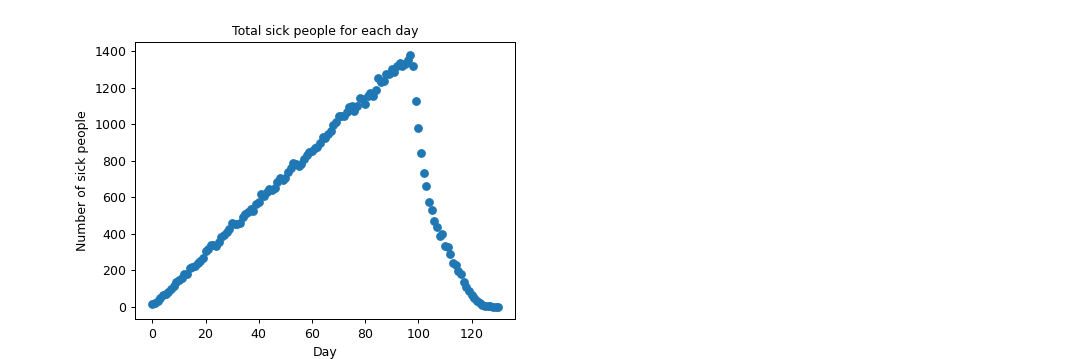

[16, 21, 33, 49, 63, 69, 79, 95, 113, 135, 147, 159, 179, 180, 214, 220, 226, 239, 249, 265, 306, 318, 336, 338, 335, 354, 383, 393, 408, 428, 459, 456, 453, 458, 492, 509, 521, 533, 524, 565, 572, 615, 607, 628, 646, 642, 651, 681, 708, 694, 707, 740, 762, 786, 781, 772, 783, 808, 829, 850, 851, 872, 875, 898, 929, 923, 946, 965, 994, 1010, 1045, 1043, 1047, 1066, 1092, 1101, 1071, 1100, 1141, 1136, 1110, 1155, 1171, 1152, 1188, 1253, 1231, 1235, 1276, 1275, 1301, 1288, 1320, 1336, 1316, 1332, 1351, 1380, 1317, 1128, 980, 844, 734, 660, 572, 532, 468, 437, 388, 397, 335, 330, 289, 242, 227, 196, 182, 138, 109, 88, 67, 47, 30, 23, 12, 7, 5, 3, 1, 1, 0]


In [16]:
#For all future graphs, the code will be the same except for the "totalsick" variable that equals plotsick(...)
#The parameters for "plotsick" will change depending on the scenario we are working with

x = np.zeros((200,200), dtype = int)
x[98:102,98:102] = 1
vaccineprob = np.random.rand(200,200)
totalsick = [16]

plt.figure(figsize=(12,4))   
totalsick = plotsick(x,0.5,0.5,0) #set pi = 0.5, set pr = 0.5
plt.subplot(1,2,1)            
plt.scatter((range(len(totalsick))),totalsick)
plt.title("Total sick people for each day",fontsize= 10)
plt.xlabel("Day",fontsize=10)
plt.ylabel("Number of sick people",fontsize= 10);
print(totalsick)

In the scenario where pi = pr = 0.5, we see that this time the peak of sick people was about 1400 around the 100th day, then it starts to drop significantly and it actually took around 130 days for everyone to recover. 

(29 sec)

<IPython.core.display.Javascript object>


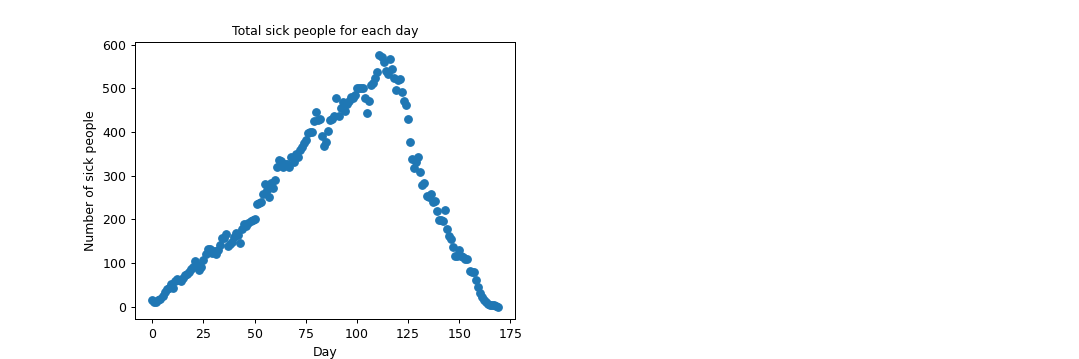

[16, 11, 12, 15, 18, 25, 33, 40, 42, 52, 44, 58, 63, 62, 58, 65, 73, 76, 80, 86, 91, 105, 95, 84, 92, 107, 121, 133, 133, 123, 128, 122, 129, 142, 158, 158, 167, 140, 144, 148, 159, 170, 165, 145, 178, 190, 185, 192, 196, 198, 202, 236, 237, 239, 258, 281, 268, 252, 283, 272, 290, 319, 336, 334, 321, 327, 327, 321, 343, 331, 349, 343, 359, 367, 374, 383, 398, 401, 400, 426, 445, 427, 430, 391, 369, 377, 403, 428, 431, 437, 477, 437, 455, 468, 448, 464, 472, 481, 479, 486, 502, 501, 500, 502, 477, 444, 472, 508, 513, 523, 538, 577, 573, 561, 541, 532, 567, 545, 524, 497, 519, 521, 491, 472, 462, 430, 377, 338, 317, 331, 342, 308, 280, 284, 253, 252, 259, 239, 243, 219, 198, 199, 196, 221, 178, 163, 155, 136, 117, 116, 131, 117, 115, 110, 109, 81, 80, 80, 62, 46, 31, 23, 16, 11, 7, 5, 4, 3, 2, 0]


In [17]:
x = np.zeros((200,200), dtype = int)
x[98:102,98:102] = 1
vaccineprob = np.random.rand(200,200)
totalsick = [16]

plt.figure(figsize=(12,4))   
totalsick = plotsick(x,0.3,0.85,0) #set pi = 0.3, set pr = 0.85
plt.subplot(1,2,1)          
plt.scatter((range(len(totalsick))),totalsick)
plt.title("Total sick people for each day",fontsize= 10)
plt.xlabel("Day",fontsize=10)
plt.ylabel("Number of sick people",fontsize= 10);
print(totalsick)

In the scenario above, we have pi = 0.3 and pr = 0.85. The graph shows that the peak appears just after 100 days and it is around 550 people that are sick. After that, the amount of sick people begins to drop significantly as usual, but the amount of days it takes for everyone to recover goes back up to 175.

(39 sec)

## Part 4: Including a vaccine

We have seen multiple scenarios of the epidemic with different values of pi and pr. We also talked about the epidemics function taking a parameter called "vac". This parameter will be the percentage of the population that gets vaccinated. We will view the animations and graphs like before, using the same code, but with the pi, pr AND vac variable changing.

<IPython.core.display.Javascript object>


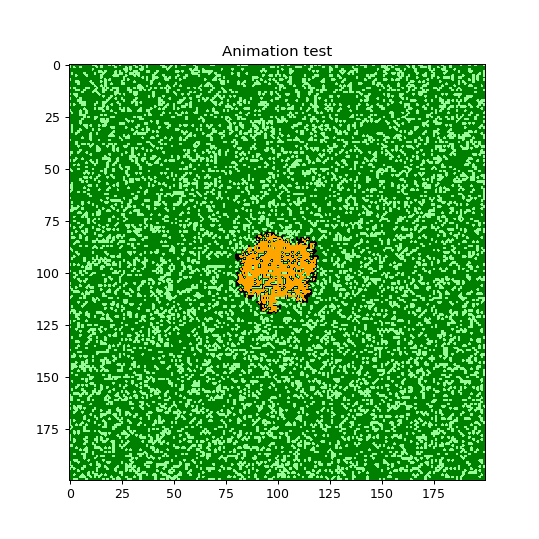

In [3]:
x = np.zeros((200,200), dtype = int)
x[98:102,98:102] = 1
vaccineprob = np.random.rand(200,200)
totalsick = [16]

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)

def animate(i):
    global x
    
    x = epidemics(x,0.5,0.5,0.2) #set pi = 0.5, set pr = 0.5, set vac = 0.15
    im.set_data(x)
    
    return im

anim = FuncAnimation(fig=fig, func=animate,  interval=200, blit=True, repeat=False)
plt.show()

We can see from the above animation that some of the population is palegreen. This is where the cell = -1 , meaning that person has been vaccinated. We notice that those cells don't change, since we decided that on the first day is when people get vaccinated and sick people cannot be vaccinated. For these particular values of pi = 0.5, pr = 0.5 and vac = 0.15, the percentage of vaccinations does not seem to control the epidemic. 

<IPython.core.display.Javascript object>


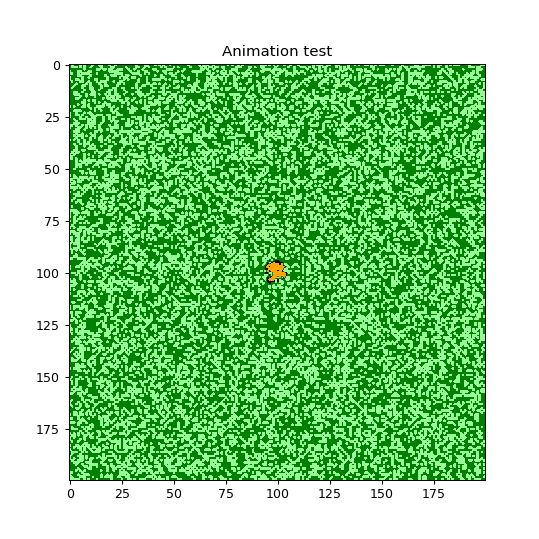

In [6]:
x = np.zeros((200,200), dtype = int)
x[98:102,98:102] = 1
vaccineprob = np.random.rand(200,200)
totalsick = [16]

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)

def animate(i):
    global x
    
    x = epidemics(x,0.5,0.5,0.35) #set pi = 0.5, set pr = 0.5, set vac = 0.35
    im.set_data(x)
    
    return im

anim = FuncAnimation(fig=fig, func=animate,  interval=200, blit=True, repeat=False)
plt.show()

The above animation has the values pi = 0.5, pr = 0.5, and vac = 0.35. In this case, there are much more vaccinations (40%). You can see that the epidemic does struggle to expand, leaving some healthy people never to get sick, but it still does manage to expand all the way to the edges. Let's increasing the vaccinations once more.

In [ ]:
x = np.zeros((200,200), dtype = int)
x[98:102,98:102] = 1
vaccineprob = np.random.rand(200,200)
totalsick = [16]

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)

def animate(i):
    global x
    
    x = epidemics(x,0.5,0.5,0.55) #set pi = 0.5, set pr = 0.5, set vac = 0.55
    im.set_data(x)
    
    return im

anim = FuncAnimation(fig=fig, func=animate,  interval=200, blit=True, repeat=False)
plt.show()

With the values pi = 0.5, pr = 0.5 and vac = 0.55, we see that the epidemic barely expands and dies out at basically the center in most cases. So the vaccine percentage is just above half yet the disease dies out early. However, in the real world this isn't likely to occur, but it is still interesting to see.

<IPython.core.display.Javascript object>


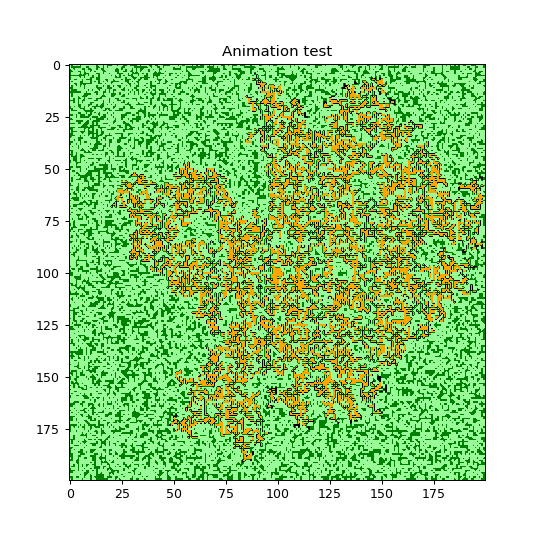

In [5]:
x = np.zeros((200,200), dtype = int)
x[98:102,98:102] = 1
vaccineprob = np.random.rand(200,200)
totalsick = [16]

fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Animation test")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)

def animate(i):
    global x
    
    x = epidemics(x,0.8,0.5,0.55) #set pi = 0.8, set pr = 0.5, set vac = 0.55
    im.set_data(x)
    
    return im

anim = FuncAnimation(fig=fig, func=animate,  interval=200, blit=True, repeat=False)
plt.show()

This time, we chose the values pi = 0.8, pr = 0.5 and vac = 0.55, so the vaccine percentage is just above half again, but the disease is more contagious this time. We see that the disease still has difficulty expanding but also still manages to reach far out to one of the edges. Now instead of animations, we can also create graphs of these scenarios, like before, to check how many people got sick for each day.

<IPython.core.display.Javascript object>


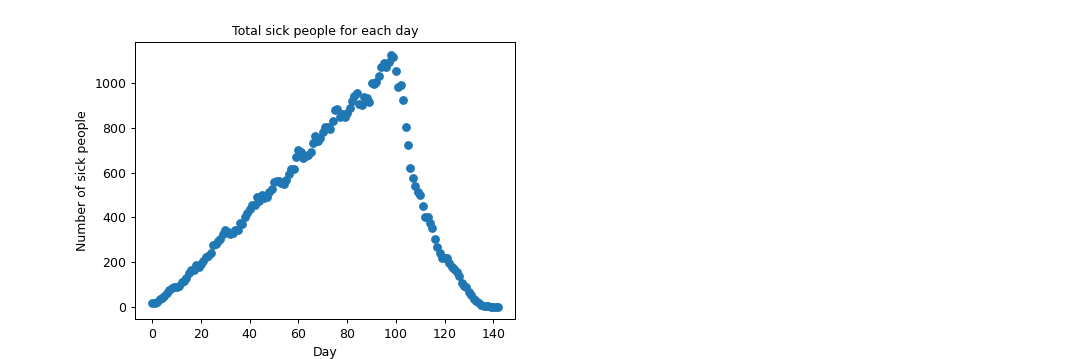

[16, 18, 23, 36, 41, 50, 60, 73, 83, 87, 88, 92, 110, 114, 127, 153, 164, 166, 185, 180, 192, 205, 223, 226, 240, 278, 280, 294, 303, 327, 344, 334, 326, 332, 346, 343, 376, 370, 402, 422, 440, 456, 456, 490, 475, 500, 488, 492, 512, 529, 558, 561, 561, 552, 549, 568, 593, 618, 619, 672, 703, 695, 664, 677, 680, 694, 732, 766, 740, 754, 781, 804, 803, 795, 831, 879, 884, 851, 861, 851, 869, 891, 920, 945, 955, 907, 902, 939, 933, 917, 1004, 999, 1008, 1033, 1072, 1091, 1073, 1097, 1128, 1118, 1054, 982, 991, 925, 807, 725, 620, 575, 539, 516, 500, 452, 401, 400, 377, 353, 304, 269, 240, 220, 217, 218, 195, 180, 169, 154, 138, 106, 93, 90, 68, 54, 37, 26, 15, 6, 5, 2, 2, 1, 1, 1, 0]


In [18]:
x = np.zeros((200,200), dtype = int)
x[98:102,98:102] = 1
vaccineprob = np.random.rand(200,200)
totalsick = [16]

plt.figure(figsize=(12,4))   
totalsick = plotsick(x,0.5,0.5,0.15) #set pi = 0.5, set pr = 0.5, set vac = 0.15
plt.subplot(1,2,1)            
plt.scatter((range(len(totalsick))),totalsick)
plt.title("Total sick people for each day",fontsize= 10)
plt.xlabel("Day",fontsize=10)
plt.ylabel("Number of sick people",fontsize= 10);
print(totalsick)

We created a graph earlier with the same pi and pr values (0.5), but this time we added the vaccinated population. We notice that the peak of total sick people this time is about 1100 compared to 1400 with no vaccine, and the number of total sick people drops significantly again at around 100 days, but the amount of days until full recovery was almost 140 compared to 130.

(27 sec)

<IPython.core.display.Javascript object>


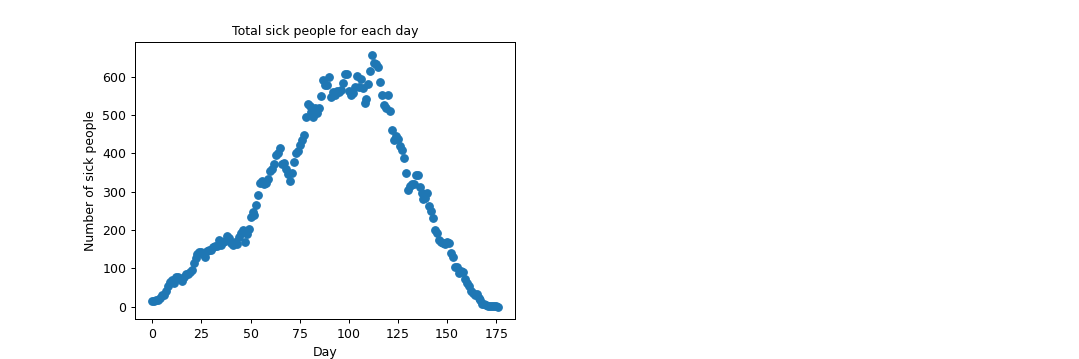

[16, 15, 17, 19, 22, 30, 30, 42, 55, 65, 69, 61, 78, 78, 73, 68, 77, 86, 86, 92, 97, 114, 128, 137, 144, 142, 138, 131, 146, 147, 147, 155, 158, 158, 173, 162, 168, 172, 185, 180, 166, 160, 168, 163, 182, 193, 201, 170, 191, 204, 235, 247, 240, 265, 291, 324, 327, 320, 323, 333, 355, 360, 372, 397, 401, 414, 373, 374, 359, 347, 327, 350, 378, 400, 405, 422, 435, 447, 494, 528, 524, 509, 494, 519, 505, 519, 550, 591, 577, 579, 599, 547, 559, 552, 562, 559, 565, 584, 608, 607, 562, 553, 558, 572, 601, 573, 594, 571, 532, 542, 582, 614, 657, 635, 633, 624, 586, 553, 525, 519, 553, 511, 461, 434, 446, 437, 419, 408, 389, 350, 304, 314, 321, 321, 344, 344, 313, 296, 280, 284, 296, 262, 250, 231, 200, 192, 175, 170, 166, 163, 168, 166, 140, 131, 105, 103, 88, 93, 91, 72, 63, 55, 40, 36, 32, 33, 24, 17, 8, 6, 5, 3, 3, 3, 2, 1, 0]


In [19]:
x = np.zeros((200,200), dtype = int)
x[98:102,98:102] = 1
vaccineprob = np.random.rand(200,200)
totalsick = [16]

plt.figure(figsize=(12,4))   
totalsick = plotsick(x,0.5,0.5,0.35) #set pi = 0.5, set pr = 0.5, set vac = 0.35
plt.subplot(1,2,1)            
plt.scatter((range(len(totalsick))),totalsick)
plt.title("Total sick people for each day",fontsize= 10)
plt.xlabel("Day",fontsize=10)
plt.ylabel("Number of sick people",fontsize= 10);
print(totalsick)

Now we have values pi = 0.5, pr = 0.5 and vac = 0.35. Here we see that the peak is now around 700 compared to 1100 or 1400, but this time, the drop begins around the 125th day, while the full recovery takes around 190 days.

(28 sec)

<IPython.core.display.Javascript object>


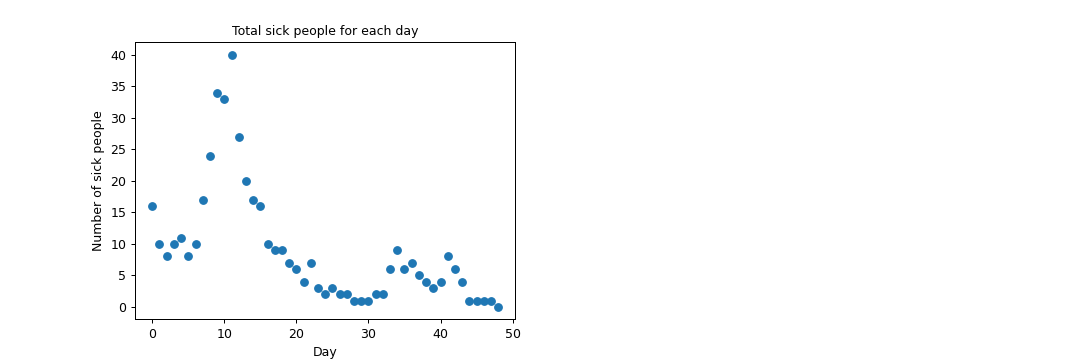

[16, 10, 8, 10, 11, 8, 10, 17, 24, 34, 33, 40, 27, 20, 17, 16, 10, 9, 9, 7, 6, 4, 7, 3, 2, 3, 2, 2, 1, 1, 1, 2, 2, 6, 9, 6, 7, 5, 4, 3, 4, 8, 6, 4, 1, 1, 1, 1, 0]


In [20]:
x = np.zeros((200,200), dtype = int)
x[98:102,98:102] = 1
vaccineprob = np.random.rand(200,200)
totalsick = [16]

plt.figure(figsize=(12,4))   
totalsick = plotsick(x,0.5,0.5,0.55) #set pi = 0.5, set pr = 0.5, set vac = 0.55
plt.subplot(1,2,1)            
plt.scatter((range(len(totalsick))),totalsick)
plt.title("Total sick people for each day",fontsize= 10)
plt.xlabel("Day",fontsize=10)
plt.ylabel("Number of sick people",fontsize= 10);
print(totalsick)

In the graph above, pi = 0.5, pr = 0.5 and vac = 0.55. We can also see from the graph above that number of sick people for each day is much more scattered compared to all the graphs we did before. The peak is only around 22, the drop seems to begin around the 15th day, and full recovery takes about 45 days, which are all much less than before. The vaccine played a role in stopping the epidemic this time for sure.

(8 sec)

# Conclusion

We have created multiple scenarios to show the behavior of an epidemic using different values for paramaters $p_i$ and $p_r$. High values of $p_i$ and $p_r$ create an epidemic where the disease is very contageous ($p_i$) but quick to recover from ($p_r$) and low values create an epidemic where the disease is not very contageous but hard to recover from. Eventually, we included a vaccine and we looked at how the vaccine can play a role in the behavior of an epidemic for a particular scenario. 

We have shown all of this through various animations and graphs. The animations give a visual on how the epidemic behaves, but we also wanted quantitative information, so we created a graph that shows the data regarding how many sick people there are for each day. The patterns and information on each graph reflects the animations of the cases we explored.